# term1_sprint4 機械学習スクラッチ ロジスティック回帰

## 2.ロジスティック回帰スクラッチ

ロジスティック回帰のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。


以下に雛形を用意してあります。このScratchLogisticRegressionクラスにコードを書き加えていってください。  
推定関係のメソッドは線形回帰と異なり、ラベルを出力するpredictメソッドと、確率を出力するpredict_probaメソッドの2種類を作成します。

雛形

In [ ]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録

    """
    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass

    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        pass
        return
    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
            Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        pass
        return

## 【問題1】仮定関数
ロジスティック回帰の仮定関数のメソッドをScratchLogisticRegressionクラスに実装してください。


ロジスティック回帰の仮定関数は、線形回帰の仮定関数を シグモイド関数 に通したものです。シグモイド関数は以下の式で表されます。

$$g(z) = \frac{1}{1+e^{−z}}.$$
線形回帰の仮定関数は次の式でした。
$$h_\theta(x) = \theta^T \cdot x.$$
まとめて書くと、ロジスティック回帰の仮定関数は次のようになります。
$$h_\theta(x) = \frac{1}{1+e^{−\theta^T \cdot x}}.$$

x
 : 特徴量ベクトル


θ
 : パラメータ（重み）ベクトル



## 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。
$$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}\\ \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m}  \sum_{i=1}^{m}(h_θ(x^{(i)}) − y^{(i)})x_j^{(i)}  ,j = 0\\ \frac{\partial J(\theta)}{\partial \theta_j} = \biggl(\frac{1}{m}  \sum_{i=1}^{m}(h_θ(x^{(i)}) − y^{(i)})x_j^{(i)} \biggr) + \frac{λ}{m}\theta_j　 ,j\geq 1$$

α
  : 学習率


i
 : サンプルのインデックス


j
 : 特徴量のインデックス


m
 : 入力されるデータの数


h
θ
(
)
 : 仮定関数


x
 : 特徴量ベクトル


θ
 : パラメータ（重み）ベクトル


x
(
i
)
 : i番目のサンプルの特徴量ベクトル


y
(
i
)
 : i番目のサンプルの正解ラベル


θ
j
 : j番目のパラメータ（重み）


λ
 : 正則化パラメータ

## 【問題3】推定
推定する仕組みを実装してください。ScratchLogisticRegressionクラスの雛形に含まれるpredictメソッドとpredict_probaメソッドに書き加えてください。


仮定関数$hθ(x)$の出力がpredict_probaの返り値、さらにその値に閾値を設けて1と0のラベルとしたものがpredictの返り値となります。

## 【問題4】目的関数
以下の数式で表されるロジスティック回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。


なお、この数式には正則化項が含まれています。


＊数式が見切れる場合、DIVERを全画面に## して御覧ください。

$$J(\theta)=  \frac{1}{m}  \sum_{i=1}^{m}[−y^{(i)} log(h_θ(x^{(i)})) − (1−y^{(i)}) log(1−h_θ(x^{(i)}))] +
\frac{λ}{2m}\sum_{j=1}^n
θ^2_j$$

m
  : 入力されるデータの数


h
θ
(
)
 : 仮定関数


x
 : 特徴量ベクトル


θ
 : パラメータ（重み）ベクトル


x
(
i
)
 : i番目のサンプルの特徴量ベクトル


y
(
i
)
 : i番目のサンプルの正解ラベル


θ
j
 : j番目のパラメータ（重み）


n
 : 特徴量の数


λ
 : 正則化パラメータ



## 解答用クラス

In [ ]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    def __init__(self, num_iter=5, lr=0.1, bias=1, regularization=0.1, verbose=True):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.regularization = regularization
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        X = np.concatenate([np.ones(X.shape[0]).reshape(-1,1), X], axis=1)
        self.theta = np.random.rand(X.shape[1])
        
        for i in range(self.iter):
            z = X @ self.theta
#             print("z",z)
            y_hat = self._sigmoid(z)
#             print("yhat", y_hat)
#             print("y", y)
            self.loss[i] = self._loss(y, y_hat)
            self.theta -= self.lr * self._gradient_descent(X, y, y_hat) 
#             print("theta",self.theta )
           
            # Xの検証データを元に予測した値の学習過程を習得
            if (type(X_val) != bool):
                self.val =1
                X2 = np.concatenate([np.ones(X_val.shape[0]).reshape(-1,1), X_val], axis=1)
                z_val = X2 @ self.theta.T
                y_hat_val = self._sigmoid(z_val)
                self.val_loss[i] = self._loss(y_val, y_hat_val) 
            
            # verboseをTrueにした際は学習過程を出力
            if self.verbose :
                print(f"--{i+1}回目~loss~-------\n{self.loss[i]}")
                print(f"--{i+1}回目~loss_val~---\n{self.val_loss[i]}")
        
# 問1（解答）------------------------------------------------------  
    # シグモイド関数の計算
    def _sigmoid(self,X):
        return 1 / (1+np.exp(-X))
        
# 問2 （解答）---------------------------------------------------------          
    def _gradient_descent(self, X, y, y_hat):
        """
        最急降下法で計算する
        """
        # 最急降下法
        error = y_hat - y
        gd = (X.T @ error) / y.size
        # theta index=0に0を入れる
        theta = np.concatenate([np.array([0]), self.theta[1:]])
        # 正則化
        L = (self.regularization / y.size) * theta
        # 最急降下法＋正則化
        return gd + L
                   
# 問３ (解答)---------------------------------------------------------
    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """ 
#         proba = self.predict_proba(X)
#         return np.where(proba < 0.5, 0, 1)
        threshold = 0.5
        return (self.predict_proba(X) > threshold).astype(int)
    
    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        X1 = np.concatenate([np.ones((X.shape[0],1)), X], axis=1)
        z = X1 @ self.theta
        return self._sigmoid(z)
        
# 問4 （解答）---------------------------------------------------------                   
    def _loss(self, y, y_hat):
        # 交差エントロピー関数
        loss = np.mean(-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat))
        # 正則化
        L = (self.regularization/(2 * len(y))) * np.sum(self.theta[1:])
        return loss + L
    
# 問7（解答）----------------------------------------------------------    
    def plot_cost(self):
        """
        損失の推移をグラフ化する。    
        検証用データが入力されていれば、学習用と検証用の損失推移を重ねてグラフ化
        """
        plt.title("Num_of_Iteration vs Loss")
        plt.xlabel("Num_of_Iteration")
        plt.ylabel("Loss")
        a = range(self.iter)
        plt.plot(range(len(self.loss)), self.loss, color="b", label="train_loss")
        if self.val ==1:
            plt.plot(range(len(self.val_loss)), self.val_loss, color="orange", label="val_loss")
        plt.grid()
        plt.legend()
        
# 問8（解答）----------------------------------------------------------    
        # 第一引数にパス文字列、第二引数に保存したいndarrayを指定する。
        np.save('theta', self.theta)

# 3.検証

## 【問題5】学習と推定
機械学習スクラッチ入門のSprintで用意したirisデータセットのvirgicolorとvirginicaの2値分類に対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。


AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。



### 5.1.1（irisデータセット)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.datasets import load_iris
#irisデータの読み込み
iris_dataset = load_iris()

# 得微量
X = pd.DataFrame(iris_dataset["data"])
X.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

#targetを読み込み、値を品種に変更。
y = pd.DataFrame(iris_dataset["target"])
y.columns = ["species"]

#1つのデータに結合、不要な要素を削除する。
df_master = pd.concat([X, y], axis=1) 
df = df_master[df_master["species"] != 0]
df = df[["petal_length", "petal_width","species"]]
print(df.shape)
df.head()

(100, 3)


,petal_length,petal_width,species
50,4.7,1.4,1
51,4.5,1.5,1
52,4.9,1.5,1
53,4.0,1.3,1
54,4.6,1.5,1


### 5.2.1 （前処理)

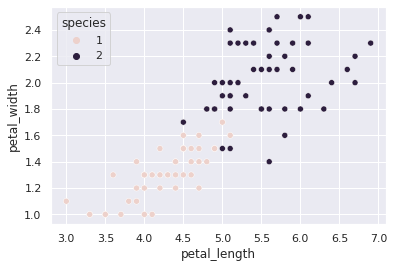

In [ ]:
sns.scatterplot(x = 'petal_length',  y='petal_width', hue="species", data=df)

In [ ]:
X = df[[ "petal_length", "petal_width"]].values
y = np.where(df["species"] ==2, 0, 1)
y



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)
print(f"Xの訓練値:{X_train.shape}  Yの訓練値:{y_train.shape}  Xの正解値:{X_test.shape}  Yの正解値:{y_test.shape}")

Xの訓練値:(70, 2)  Yの訓練値:(70,)  Xの正解値:(30, 2)  Yの正解値:(30,)


### 5.3.1（学習）

In [ ]:
slg = ScratchLogisticRegression(num_iter=10000, lr=0.01, bias=1, verbose=False)
slg.fit(X_train, y_train, X_test, y_test)

In [ ]:
y_pred = slg.predict(X_test)
y_proba = slg.predict_proba(X_test)
print(y_pred)
print(y_proba)

[0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0]
[0.13815663 0.1507939  0.52728628 0.12642077 0.33546232 0.57041457
 0.14922454 0.77212716 0.65831823 0.65831823 0.39668345 0.67826243
 0.28661841 0.27570679 0.59665099 0.35040029 0.17793353 0.74920491
 0.08633392 0.76573186 0.39668345 0.847215   0.70393219 0.59231221
 0.47783377 0.11681198 0.84487073 0.15152395 0.71505987 0.08776421]


In [ ]:
y_test

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

accuracy 0.9666666666666667
precision 0.9285714285714286
recall 1.0
f1 0.962962962962963


### 5.4.1 sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,y_train)

y_pred2 = lr.predict(X_test)
y_proba2 = lr.predict_proba(X_test)
print(y_pred2)

[0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0]


In [ ]:
accuracy_s = accuracy_score(y_test, y_pred2)
precision_s = precision_score(y_test, y_pred2)
recall_s = recall_score(y_test, y_pred2)
f1_s = f1_score(y_test, y_pred2)

print('accuracy',accuracy_s)
print('precision',precision_s)
print('recall',recall_s)
print('f1',f1_s)

accuracy 1.0
precision 1.0
recall 1.0
f1 1.0


### 【問題6】学習曲線のプロット
学習曲線を見て損失が適切に下がっているかどうか確認してください。

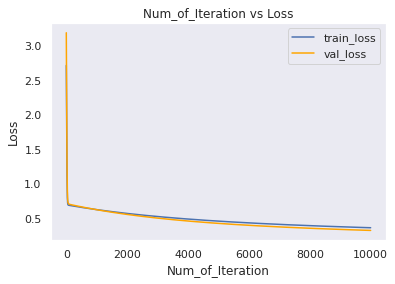

In [ ]:
slg.plot_cost()

### 【問題7】決定領域の可視化
決定領域を可視化してください。

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X,y,model,step=0.01,
                    title='decision region',
                    xlabel="petal_length",
                    ylabel="petal_width",
                    target_names=['versicolor', 'virginica']):
    
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()

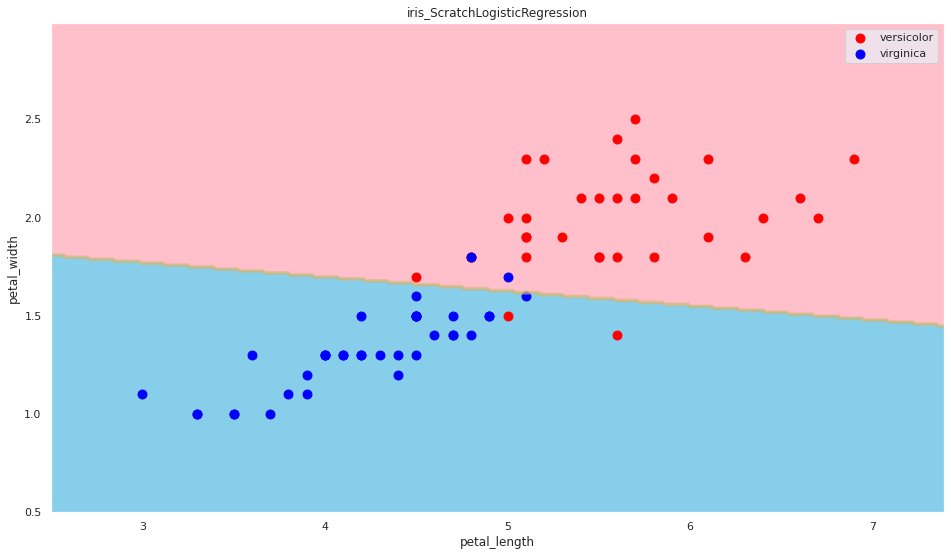

In [ ]:
fit,ax = plt.subplots(figsize=(16,9))
decision_region(X_train, y_train, slg, title='iris_ScratchLogisticRegression');

## 【問題8】（アドバンス課題）重みの保存
検証が容易になるように、学習した重みを保存および読み込みができるようにしましょう。pickleモジュールやNumPyのnp.savezを利用します。


pickle — Python オブジェクトの直列化 — Python 3.7.4 ドキュメント  
https://docs.python.org/ja/3/library/pickle.html


numpy.savez — NumPy v1.17 Manual  
https://docs.scipy.org/doc/numpy/reference/generated/numpy.savez.html

In [ ]:
# np.saveとセットで使用する、ndarrayをそのまま返す。
np.load('theta.npy')

array([ 4.89564472, -0.17997886, -2.4628065 ])